Name =Khurram Shahin
Regs No= 12112093
Roll No=50 
Teacher =Shivangini Gupta
Subject= Machine Learning 1
Section =K21UN

 Exploring the Impact of Gaming Habits on Sleep and Mental Well-being in Young Adults: A Machine Learning Approach
Introduction: In recent years, the prevalence of gaming among young adults has risen significantly, prompting concerns
about its potential effects on sleep quality and mental health. This study aims to investigate the relationship between
gaming habits, sleep patterns, and mental well-being in a cohort of young adults. Leveraging machine learning techniques, 
we seek to identify patterns and predictors that may indicate susceptibility to sleep disturbances, headaches, stress, and 
depression among this demographic.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Data Collection and Preprocessing

In [2]:
df=pd.read_csv("student.csv")
df

,Timestamp,Age,gender,Level of Education,Are you Playing Online Games?,How much time spend in gaming?,When do you play the game most of the time during the day?,Do you feel Hamper in sleep?,Do you feel the Headache?,Do you feel mental Stress?,Do you feel Depression?,Your reading attention level after the gaming?,Your Present Academic Result?
0,13-08-2022 21:04,23,Male,Under Graduation,Sometimes,Below 1 hour,Mid-Night,Sometimes,Sometimes,Yes,Yes,Good,Good
1,13-08-2022 21:05,22,Male,Under Graduation,Yes,01-Feb,Mid-Night,Sometimes,Yes,No,Yes,Good,Good
2,13-08-2022 21:13,23,Male,Under Graduation,Yes,01-Feb,Mid-Night,No,No,No,No,Good,Good
3,13-08-2022 21:14,18,Male,HSC,Sometimes,01-Feb,Evening,No,Sometimes,Yes,Yes,Average,Average
4,13-08-2022 21:14,19,Male,Under Graduation,Yes,01-Feb,Mid-Night,Sometimes,Sometimes,No,Sometimes,Average,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,15-05-2023 09:05,20,Female,Post Graduation,Sometimes,2-3 hours,Morning,Yes,Sometimes,Yes,Yes,Moderate,Satisfactory
281,28-03-2023 14:20,23,Male,Under Graduation,Sometimes,Below 1 hour,Afternoon,Yes,Sometimes,Yes,Yes,Moderate,Satisfactory
282,11-02-2023 18:35,26,Female,Graduation,Often,2-3 hours,Evening,Yes,Sometimes,Yes,Yes,Low,Good
283,25-12-2022 22:50,21,Male,High School,Sometimes,1-2 hours,Night,Yes,Sometimes,Yes,Yes,Moderate,Satisfactory


# Now i have to do some data cleaning part 

In [3]:
df.drop(["Timestamp"], axis=1, inplace=True)

In [4]:
df.head(5)

,Age,gender,Level of Education,Are you Playing Online Games?,How much time spend in gaming?,When do you play the game most of the time during the day?,Do you feel Hamper in sleep?,Do you feel the Headache?,Do you feel mental Stress?,Do you feel Depression?,Your reading attention level after the gaming?,Your Present Academic Result?
0,23,Male,Under Graduation,Sometimes,Below 1 hour,Mid-Night,Sometimes,Sometimes,Yes,Yes,Good,Good
1,22,Male,Under Graduation,Yes,01-Feb,Mid-Night,Sometimes,Yes,No,Yes,Good,Good
2,23,Male,Under Graduation,Yes,01-Feb,Mid-Night,No,No,No,No,Good,Good
3,18,Male,HSC,Sometimes,01-Feb,Evening,No,Sometimes,Yes,Yes,Average,Average
4,19,Male,Under Graduation,Yes,01-Feb,Mid-Night,Sometimes,Sometimes,No,Sometimes,Average,Good


# Now I have to change the column names so that it is easy too understand

In [5]:
# Define a dictionary to map old column names to new column names
column_name_mapping = {
    "Are you Playing Online Games?": "HowOften YouPlay",
    "How much time spend in gaming?": "Time Spent On Gaming",
    "When do you play the game most of the time during the day?":"when did You Play"
    # Add more mappings as needed
}

# Rename columns using the dictionary
df.rename(columns=column_name_mapping, inplace=True)

# Display the new column names
print("\nNew column names:")
print(df.columns)


New column names:
Index(['Age', 'gender', 'Level of Education', 'HowOften YouPlay',
       'Time Spent On Gaming', 'when did You Play',
       'Do you feel Hamper in sleep?', 'Do  you feel the Headache?',
       'Do you feel mental Stress?', 'Do you feel Depression?',
       'Your reading attention level after the gaming?',
       'Your Present Academic Result? '],
      dtype='object')


In [6]:
df.head(1)

,Age,gender,Level of Education,HowOften YouPlay,Time Spent On Gaming,when did You Play,Do you feel Hamper in sleep?,Do you feel the Headache?,Do you feel mental Stress?,Do you feel Depression?,Your reading attention level after the gaming?,Your Present Academic Result?
0,23,Male,Under Graduation,Sometimes,Below 1 hour,Mid-Night,Sometimes,Sometimes,Yes,Yes,Good,Good


#### Age: Age of the individuals
#### Gender: Male or Female
#### Level of Education: Education level attained
#### HowOften YouPlay: Frequency of playing games
#### Time Spent On Gaming: Duration of gaming sessions
#### when did You Play: Time of day for gaming
#### Do you feel Hamper in sleep?: Experience sleep disturbances
#### Do you feel the Headache?: Experience headaches
#### Do you feel mental Stress?: Experience mental stress
#### Do you feel Depression?: Experience depression symptoms
#### Your reading attention level after the gaming?: Reading attention level post-gaming
#### Your Present Academic Result? : Current academic performance


In [7]:
df.describe()

,Age
count,285.000000
mean,22.245614
std,2.266417
min,17.000000
25%,22.000000
50%,22.000000
75%,23.000000
max,28.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             285 non-null    int64 
 1   gender                                          285 non-null    object
 2   Level of Education                              285 non-null    object
 3   HowOften YouPlay                                285 non-null    object
 4   Time Spent On Gaming                            285 non-null    object
 5   when did You Play                               285 non-null    object
 6   Do you feel Hamper in sleep?                    285 non-null    object
 7   Do  you feel the Headache?                      285 non-null    object
 8   Do you feel mental Stress?                      285 non-null    object
 9   Do you feel Depression?                         285 no

In [9]:
# Define a mapping of categorical values to numerical values
time_spent_mapping = {
    'Below 1 hour': 1,
    '1-2': 2,
    '2-3': 3,
    # Add more mappings as needed
}

# Convert the column to string type (if necessary)
df['Time Spent On Gaming'] = df['Time Spent On Gaming'].astype(str)

# Convert the categorical values to numerical values using the mapping
df['Time Spent On Gaming'] = df['Time Spent On Gaming'].map(time_spent_mapping)

# Display the modified column
print(df['Time Spent On Gaming'])

0      1.0
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
280    NaN
281    1.0
282    NaN
283    NaN
284    1.0
Name: Time Spent On Gaming, Length: 285, dtype: float64


In [10]:
# Define a custom mapping dictionary
education_mapping = {
    'HSC': 1,
    'Under Graduation': 2,
    'Post Graduation': 3
}

# Replace categorical values with numerical values using the mapping
df['Level of Education'] = df['Level of Education'].map(education_mapping)

# Display the modified column
print(df['Level of Education'])

0      2.0
1      2.0
2      2.0
3      1.0
4      2.0
      ... 
280    3.0
281    2.0
282    NaN
283    NaN
284    3.0
Name: Level of Education, Length: 285, dtype: float64


In [11]:
# Calculate the median of the 'Level of Education' column
education_median = df['Level of Education'].median()

# Fill null values with the median
df['Level of Education'].fillna(education_median, inplace=True)

# Verify that there are no more null values
print(df.isnull().sum())


Age                                                 0
gender                                              0
Level of Education                                  0
HowOften YouPlay                                    0
Time Spent On Gaming                              168
when did You Play                                   0
Do you feel Hamper in sleep?                        0
Do  you feel the Headache?                          0
Do you feel mental Stress?                          0
Do you feel Depression?                             0
Your reading attention level after the gaming?      0
Your Present Academic Result?                       0
dtype: int64


In [12]:
# Calculate the median of the 'Level of Education' column
education_median = df['Time Spent On Gaming'].median()

# Fill null values with the median
df['Time Spent On Gaming'].fillna(education_median, inplace=True)

# Verify that there are no more null values
print(df.isnull().sum())

Age                                               0
gender                                            0
Level of Education                                0
HowOften YouPlay                                  0
Time Spent On Gaming                              0
when did You Play                                 0
Do you feel Hamper in sleep?                      0
Do  you feel the Headache?                        0
Do you feel mental Stress?                        0
Do you feel Depression?                           0
Your reading attention level after the gaming?    0
Your Present Academic Result?                     0
dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
le = LabelEncoder()
features_to_encode = ["gender","HowOften YouPlay","when did You Play","Do you feel Hamper in sleep?",
                       "Do you feel Depression?","Do  you feel the Headache?","Do you feel mental Stress?","Your reading attention level after the gaming?","Your Present Academic Result? "]
for feature in features_to_encode:
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [14]:
df

,Age,gender,Level of Education,HowOften YouPlay,Time Spent On Gaming,when did You Play,Do you feel Hamper in sleep?,Do you feel the Headache?,Do you feel mental Stress?,Do you feel Depression?,Your reading attention level after the gaming?,Your Present Academic Result?
0,23,1,2.0,3,1.0,2,1,1,2,2,3,3
1,22,1,2.0,4,1.0,2,1,2,0,2,3,3
2,23,1,2.0,4,1.0,2,0,0,0,0,3,3
3,18,1,1.0,3,1.0,1,0,1,2,2,0,0
4,19,1,2.0,4,1.0,2,1,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
280,20,0,3.0,3,1.0,3,2,1,2,2,6,4
281,23,1,2.0,3,1.0,0,2,1,2,2,6,4
282,26,0,2.0,1,1.0,1,2,1,2,2,5,3
283,21,1,2.0,3,1.0,4,2,1,2,2,6,4


In [15]:
df.isnull().sum()

Age                                               0
gender                                            0
Level of Education                                0
HowOften YouPlay                                  0
Time Spent On Gaming                              0
when did You Play                                 0
Do you feel Hamper in sleep?                      0
Do  you feel the Headache?                        0
Do you feel mental Stress?                        0
Do you feel Depression?                           0
Your reading attention level after the gaming?    0
Your Present Academic Result?                     0
dtype: int64

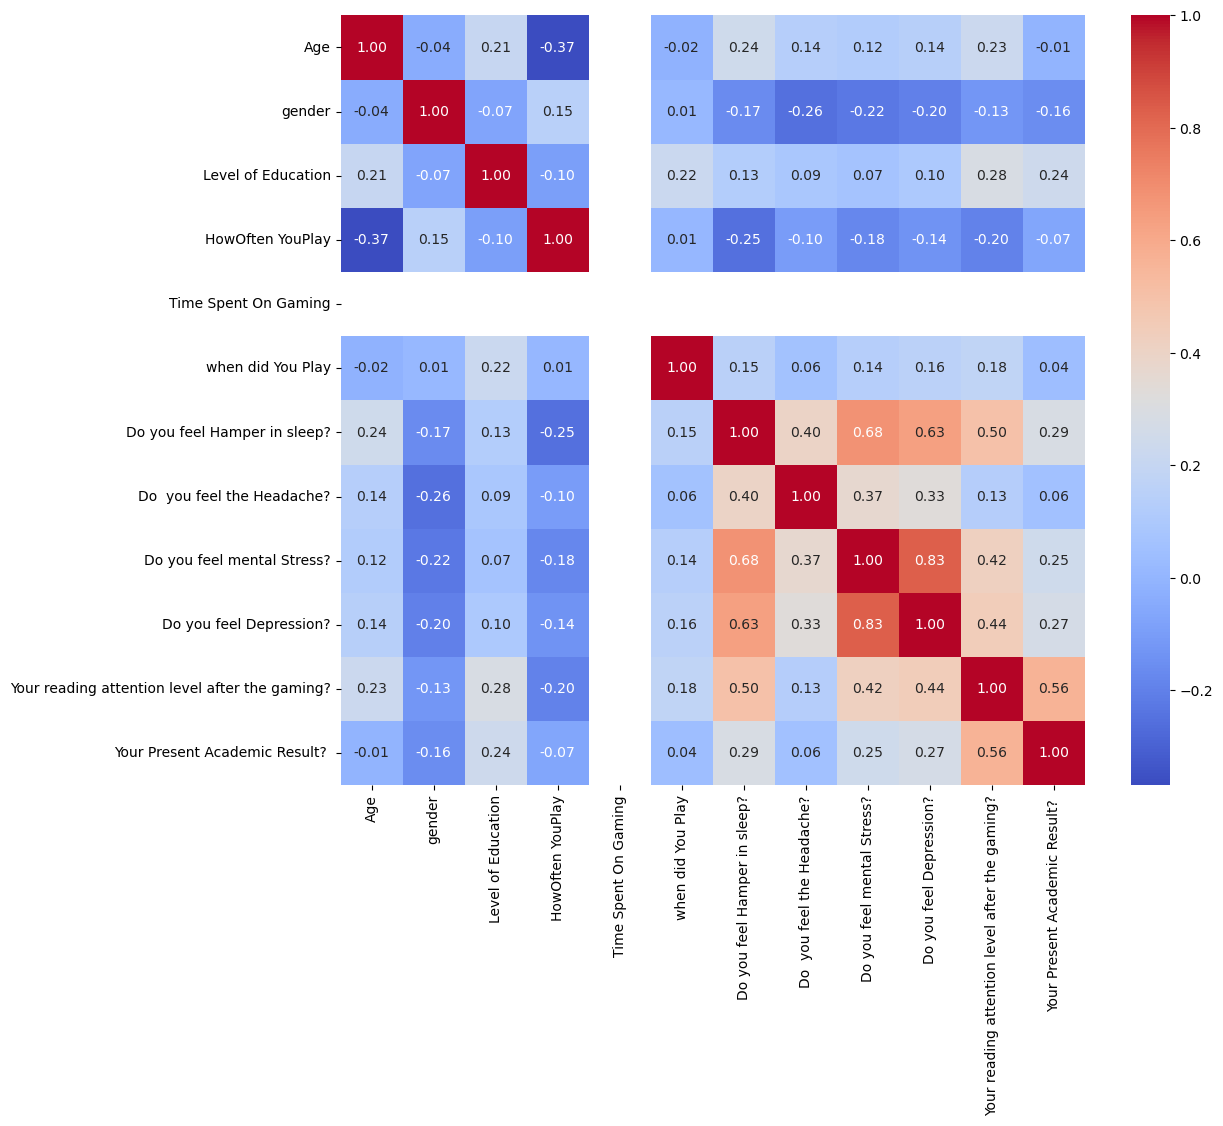

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

C:\Users\khurr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


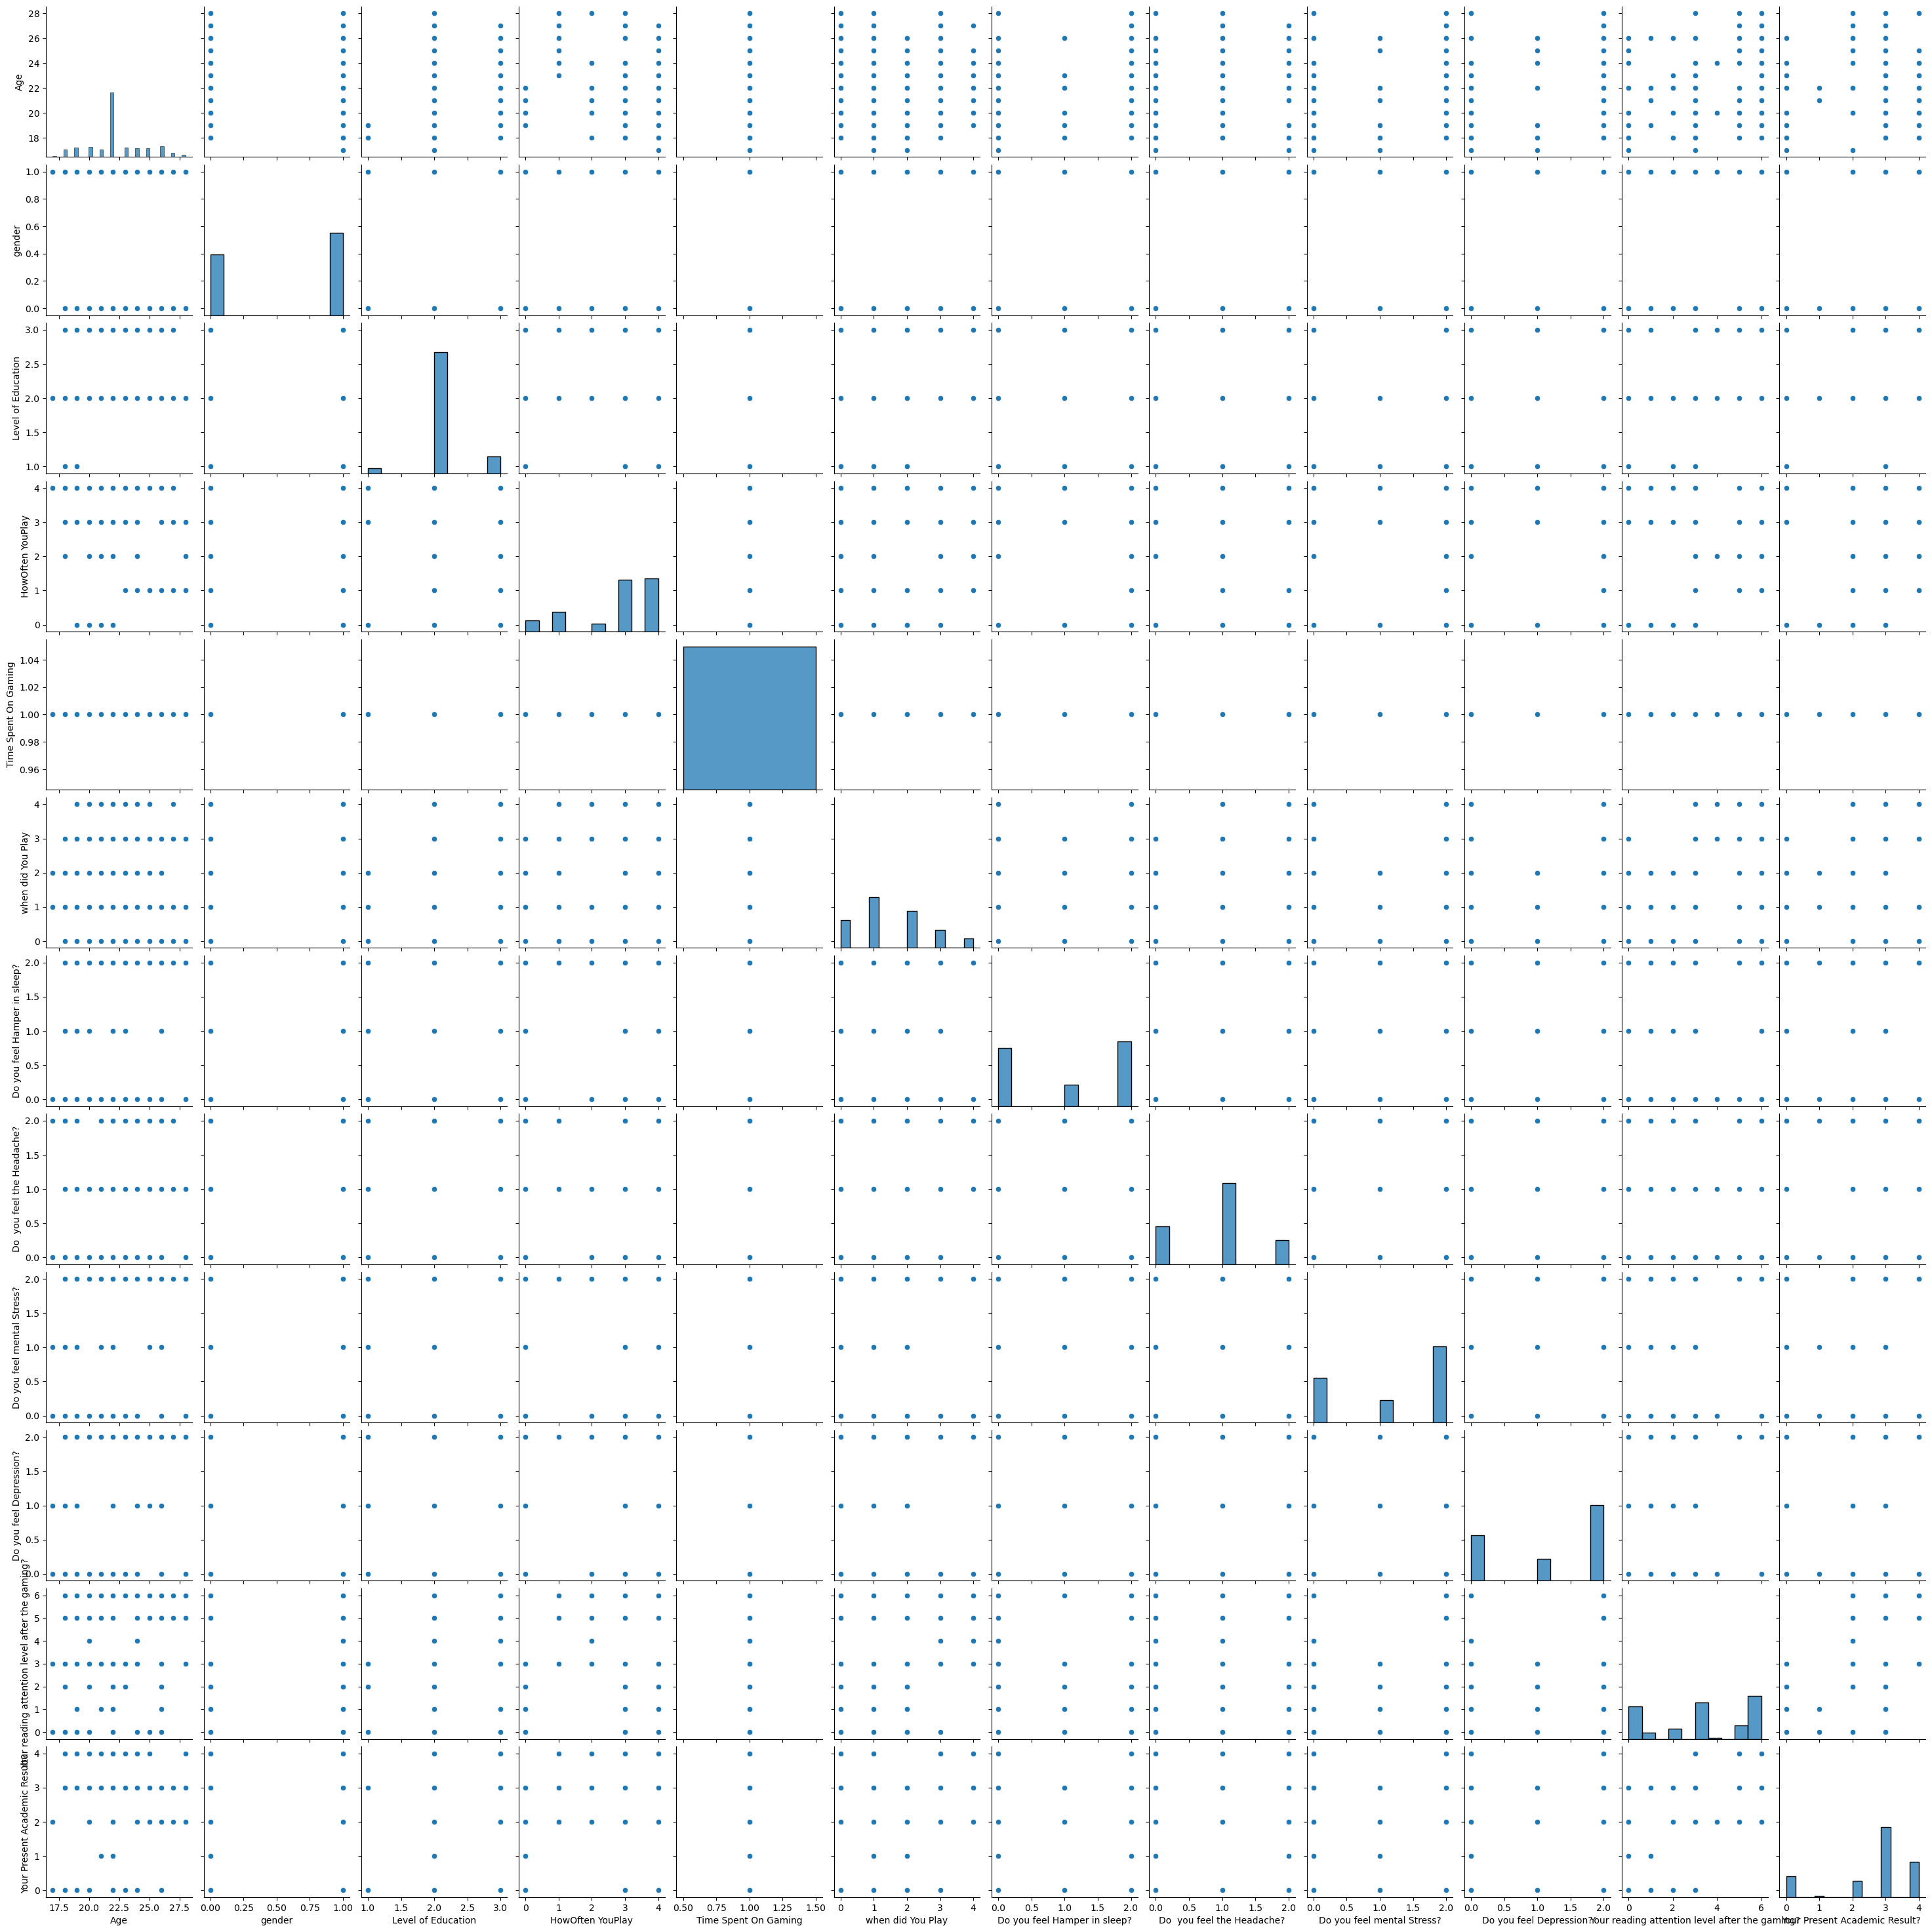

In [17]:
# Create a pairplot
sns.pairplot(df)
plt.show()

1. Linear Regression


It is used to estimate real values (cost of houses, number of calls, total sales, etc.) based on a continuous variable(s). Here, we establish the relationship between independent and dependent variables by fitting the best line.

This best-fit line is known as the regression line and is represented by a linear equation Y= a*X + b.



### Simple Linear Regression

In [18]:
x=df[['Your reading attention level after the gaming?']]
y=df[['Your Present Academic Result? ']]

In [19]:

y1=df['HowOften YouPlay'].values.reshape(-1, 1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=60)

In [21]:
model = LinearRegression()

# You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

In [22]:
y_pred = model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
r2 = r2_score(y_test, y_pred)
print("R2 score of SLR: ", r2)

NameError: name 'y_pred' is not defined

In [25]:
# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)

# intercept of the model
print('\nIntercept of model',model.intercept_)



Coefficient of model : [[0.35097078]]

Intercept of model [1.46631492]


 An R-squared score of 0.26 indicates that the linear regression model explains only 26% of the variance in the diabetes variable.
Hence, we can't use this simple linear regression model.

Lets try simple linear regression model for different columns

In [26]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming 'df' contains your DataFrame

# Get the list of column names except the target variable 'HowOften YouPlay'
predictor_columns = df.columns[df.columns != 'Your Present Academic Result? ']

# Perform simple linear regression for each predictor column
for column in predictor_columns:
    # Prepare data
    X = df[[column]]
    y = df['Your Present Academic Result? ']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Add constant to independent variable
    X_train_sm = sm.add_constant(X_train)
    
    # Fit the regression model
    lr = sm.OLS(y_train, X_train_sm).fit()
    
    # Print the regression summary
    print(f"Regression summary for predictor column '{column}':")
    print(lr.summary())
    print("\n")


Regression summary for predictor column 'Age':
                                  OLS Regression Results                                  
Dep. Variable:     Your Present Academic Result?    R-squared:                       0.001
Model:                                        OLS   Adj. R-squared:                 -0.004
Method:                             Least Squares   F-statistic:                    0.1454
Date:                            Sun, 07 Jul 2024   Prob (F-statistic):              0.703
Time:                                    17:24:55   Log-Likelihood:                -332.00
No. Observations:                             199   AIC:                             668.0
Df Residuals:                                 197   BIC:                             674.6
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t

# As We can see the reading attention level after the gaming? increases with increase in result 

In [27]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming 'df' contains your DataFrame

# Get the list of column names except the target variable 'Your Present Academic Result?'
predictor_columns = df.columns[df.columns != 'Your Present Academic Result? ']

# Perform simple linear regression for each predictor column
for column in predictor_columns:
    # Prepare data
    X = df[[column]]
    
    # Loop through each target variable
    for target_column in df.columns:
        if target_column != column:  # Ensure target column is not the same as predictor column
            y = df[target_column]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

            # Add constant to independent variable
            X_train_sm = sm.add_constant(X_train)

            # Fit the regression model
            lr = sm.OLS(y_train, X_train_sm).fit()

            # Print the regression summary
            print(f"Regression summary for predictor column '{column}' with target '{target_column}':")
            print(lr.summary())
            print("\n")


Regression summary for predictor column 'Age' with target 'gender':
                            OLS Regression Results                            
Dep. Variable:                 gender   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.419
Date:                Sun, 07 Jul 2024   Prob (F-statistic):              0.235
Time:                        17:24:55   Log-Likelihood:                -140.59
No. Observations:                 199   AIC:                             285.2
Df Residuals:                     197   BIC:                             291.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Regression summary for predictor column 'Age' with target 'Do you feel mental Stress?':
                                OLS Regression Results                                
Dep. Variable:     Do you feel mental Stress?   R-squared:                       0.029
Model:                                    OLS   Adj. R-squared:                  0.024
Method:                         Least Squares   F-statistic:                     5.912
Date:                        Sun, 07 Jul 2024   Prob (F-statistic):             0.0159
Time:                                17:24:55   Log-Likelihood:                -255.47
No. Observations:                         199   AIC:                             514.9
Df Residuals:                             197   BIC:                             521.5
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          

C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Regression summary for predictor column 'gender' with target 'Do you feel Depression?':
                               OLS Regression Results                              
Dep. Variable:     Do you feel Depression?   R-squared:                       0.066
Model:                                 OLS   Adj. R-squared:                  0.061
Method:                      Least Squares   F-statistic:                     13.94
Date:                     Sun, 07 Jul 2024   Prob (F-statistic):           0.000247
Time:                             17:24:55   Log-Likelihood:                -252.25
No. Observations:                      199   AIC:                             508.5
Df Residuals:                          197   BIC:                             515.1
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
C:\Users\khurr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1606: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
C:\Users\khurr\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1808: RuntimeWarning: Precision loss occurred in moment calculation due to c

                                 OLS Regression Results                                 
Dep. Variable:     Do you feel Hamper in sleep?   R-squared:                       0.084
Model:                                      OLS   Adj. R-squared:                  0.079
Method:                           Least Squares   F-statistic:                     18.00
Date:                          Sun, 07 Jul 2024   Prob (F-statistic):           3.40e-05
Time:                                  17:24:56   Log-Likelihood:                -258.09
No. Observations:                           199   AIC:                             520.2
Df Residuals:                               197   BIC:                             526.8
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Regression summary for predictor column 'when did You Play' with target 'Do you feel mental Stress?':
                                OLS Regression Results                                
Dep. Variable:     Do you feel mental Stress?   R-squared:                       0.002
Model:                                    OLS   Adj. R-squared:                 -0.003
Method:                         Least Squares   F-statistic:                    0.3330
Date:                        Sun, 07 Jul 2024   Prob (F-statistic):              0.565
Time:                                17:24:56   Log-Likelihood:                -258.24
No. Observations:                         199   AIC:                             520.5
Df Residuals:                             197   BIC:                             527.1
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                        coef

C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Regression summary for predictor column 'Do  you feel the Headache?' with target 'Level of Education':
                            OLS Regression Results                            
Dep. Variable:     Level of Education   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.307
Date:                Sun, 07 Jul 2024   Prob (F-statistic):              0.254
Time:                        17:24:57   Log-Likelihood:                -90.124
No. Observations:                 199   AIC:                             184.2
Df Residuals:                     197   BIC:                             190.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
------------

C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Regression summary for predictor column 'Do  you feel the Headache?' with target 'Your reading attention level after the gaming?':
                                          OLS Regression Results                                          
Dep. Variable:     Your reading attention level after the gaming?   R-squared:                       0.012
Model:                                                        OLS   Adj. R-squared:                  0.007
Method:                                             Least Squares   F-statistic:                     2.456
Date:                                            Sun, 07 Jul 2024   Prob (F-statistic):              0.119
Time:                                                    17:24:57   Log-Likelihood:                -449.83
No. Observations:                                             199   AIC:                             903.7
Df Residuals:                                                 197   BIC:                             910.2
Df Model:    

C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                               OLS Regression Results                              
Dep. Variable:     Do you feel Depression?   R-squared:                       0.624
Model:                                 OLS   Adj. R-squared:                  0.622
Method:                      Least Squares   F-statistic:                     326.6
Date:                     Sun, 07 Jul 2024   Prob (F-statistic):           1.10e-43
Time:                             17:24:57   Log-Likelihood:                -161.80
No. Observations:                      199   AIC:                             327.6
Df Residuals:                          197   BIC:                             334.2
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                                OLS Regression Results                                
Dep. Variable:     Do  you feel the Headache?   R-squared:                       0.166
Model:                                    OLS   Adj. R-squared:                  0.161
Method:                         Least Squares   F-statistic:                     39.09
Date:                        Sun, 07 Jul 2024   Prob (F-statistic):           2.46e-09
Time:                                17:24:57   Log-Likelihood:                -177.37
No. Observations:                         199   AIC:                             358.7
Df Residuals:                             197   BIC:                             365.3
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

C:\Users\khurr\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [28]:
y_train.info()
X_train.info()

<class 'pandas.core.series.Series'>
Index: 199 entries, 182 to 102
Series name: Your Present Academic Result? 
Non-Null Count  Dtype
--------------  -----
199 non-null    int32
dtypes: int32(1)
memory usage: 2.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 182 to 102
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   Your reading attention level after the gaming?  199 non-null    int32
dtypes: int32(1)
memory usage: 2.3 KB


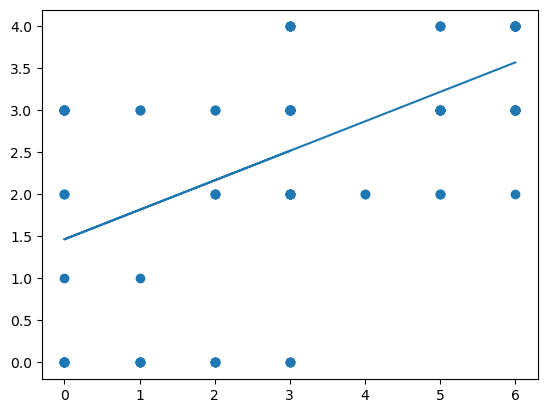

In [29]:
#plot Training data plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,model.predict(X_train))

NameError: name 'y_pred' is not defined

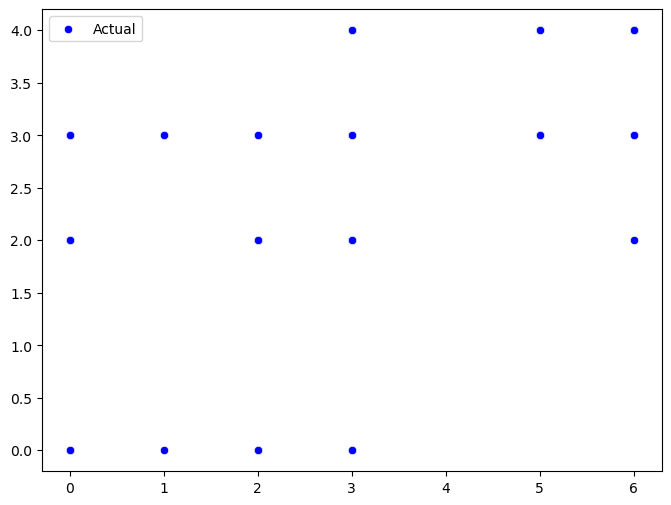

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test.squeeze().ravel(), y=y_test.ravel(), color='blue', label='Actual')
sns.lineplot(x=X_test.squeeze().ravel(), y=y_pred.ravel(), color='red', label='Predicted')
plt.xlabel('Do you feel Depression?')
plt.ylabel('Do you feel mental Stress?')
plt.title('Linear Regression: Depression vs. Mental Stress')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
residuals = y_test.squeeze() - y_pred.squeeze()  # Ensure both arrays are 1-dimensional
plt.figure(figsize=(10, 6))
plt.scatter(y_pred.squeeze(), residuals, color='green')  # Use .squeeze() to make sure arrays are 1-dimensional
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


# Multiple Linear Regression

In [ ]:
df.columns

In [ ]:
x_multiple=df.drop('Your reading attention level after the gaming?', axis=1)

In [ ]:
x_multiple

In [31]:
y

0      3
1      3
2      3
3      0
4      3
      ..
280    4
281    4
282    3
283    4
284    4
Name: Your Present Academic Result? , Length: 285, dtype: int32

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_multiple, y, test_size=0.3, random_state=42)

NameError: name 'x_multiple' is not defined

In [33]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3097159022771828

In [34]:
y_pred_multiple = model.predict(X_test)

In [35]:
r2 = r2_score(y_test, y_pred_multiple)
print("R2 score of MLR: ", r2)

R2 score of MLR:  0.3097159022771828


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Get the list of column names except the target variable 'Your Present Academic Result?'
predictor_columns = df.columns[df.columns != 'Your Present Academic Result? ']

# Iterate through each predictor column
for column in predictor_columns:
    # Set the target variable for this iteration
    y = df[column]

    # Create a DataFrame containing all columns except the target variable
    x_multiple = df.drop(column, axis=1)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(x_multiple, y, test_size=0.3, random_state=42)

    # Initialize the linear regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Evaluate the model's performance on the testing data
    score = model.score(X_test, y_test)
    print(f"R2 score of MLR for target variable '{column}':", score)

    # Make predictions on the testing data
    y_pred_multiple = model.predict(X_test)

    # Calculate R2 score
    r2 = r2_score(y_test, y_pred_multiple)
    print(f"R2 score of MLR for target variable '{column}':", r2)


R2 score of MLR for target variable 'Age': -0.123642775277232
R2 score of MLR for target variable 'Age': -0.123642775277232
R2 score of MLR for target variable 'gender': -0.12101425636780849
R2 score of MLR for target variable 'gender': -0.12101425636780849
R2 score of MLR for target variable 'Level of Education': 0.06932928285723738
R2 score of MLR for target variable 'Level of Education': 0.06932928285723738
R2 score of MLR for target variable 'HowOften YouPlay': -0.03499223045772015
R2 score of MLR for target variable 'HowOften YouPlay': -0.03499223045772015
R2 score of MLR for target variable 'Time Spent On Gaming': 1.0
R2 score of MLR for target variable 'Time Spent On Gaming': 1.0
R2 score of MLR for target variable 'when did You Play': 0.06952524402735127
R2 score of MLR for target variable 'when did You Play': 0.06952524402735127
R2 score of MLR for target variable 'Do you feel Hamper in sleep?': 0.597733657709933
R2 score of MLR for target variable 'Do you feel Hamper in sleep

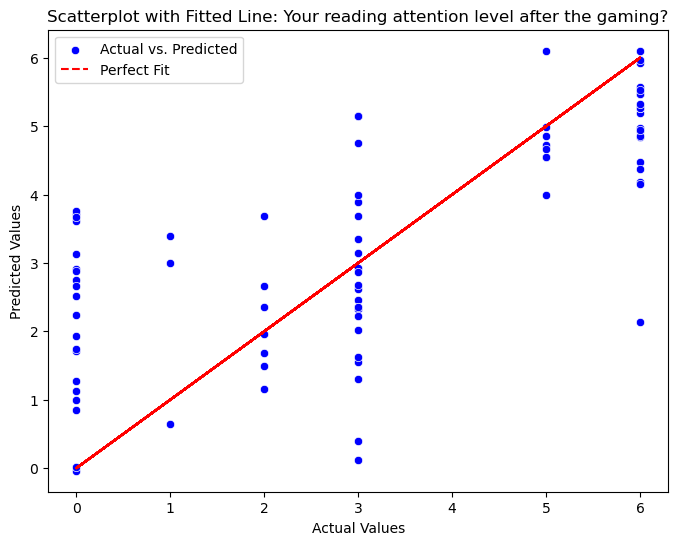

In [37]:
    # Plotting Scatterplot with Fitted Line
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred_multiple, color='blue', label='Actual vs. Predicted')
    plt.plot(y_test, y_test, color='red', label='Perfect Fit', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Scatterplot with Fitted Line: {column}')
    plt.legend()
    plt.show()


# Random Forest Regression

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [39]:
m = RandomForestRegressor(20)
m1= RandomForestClassifier(300)


In [40]:
m.fit(X_train, y_train)
m.score(X_test, y_test)

0.6167743094789706

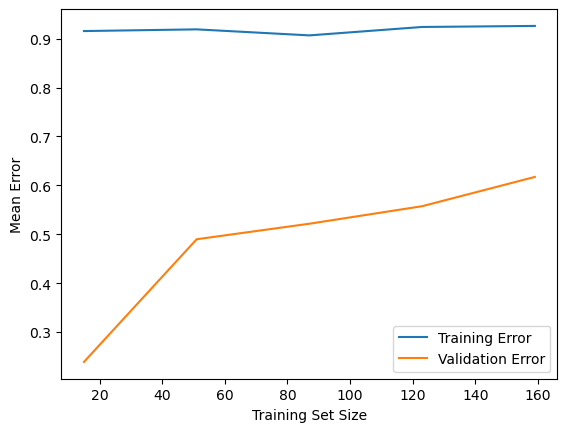

In [41]:
from sklearn.model_selection import learning_curve

# Assuming you already have your model trained (m) and separate training (X_train) and validation data (X_val, y_val)

train_sizes, train_scores, cv_scores = learning_curve(m, X_train, y_train, cv=5)

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Error')
plt.plot(train_sizes, cv_scores.mean(axis=1), label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Error')
plt.legend()
plt.show()

# Random Forest Classifier


In [42]:
m1.fit(X_train, y_train)

m1.score(X_test, y_test)

0.43023255813953487

C:\Users\khurr\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


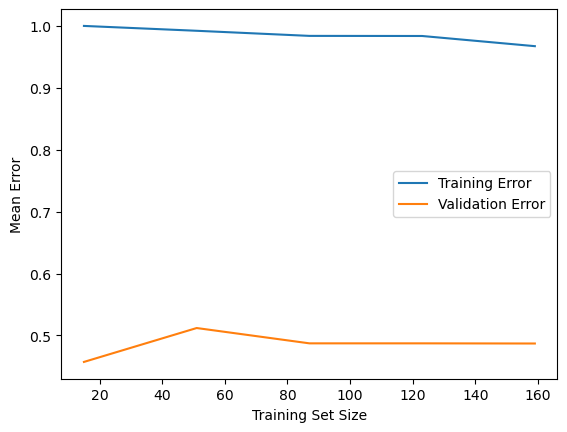

In [43]:
from sklearn.model_selection import learning_curve

# Assuming you already have your model trained (m) and separate training (X_train) and validation data (X_val, y_val)

train_sizes, train_scores, cv_scores = learning_curve(m1, X_train, y_train, cv=5)

# Plot the learning curve
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Error')
plt.plot(train_sizes, cv_scores.mean(axis=1), label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Error')
plt.legend()
plt.show()

# Logistics Regression

 It is a classification algorithm, not a regression algorithm. It is used to estimate discrete
values ( Binary values like 0/1, yes/no, true/false ) based on a given set of independent variable(s).
In simple words, it predicts the probability of the occurrence of an event by fitting data to a logistic
function. Hence, it is also known as logit regression. Since it predicts the probability, its output values lie
between 0 and 1 (as expected).

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [45]:
df

,Age,gender,Level of Education,HowOften YouPlay,Time Spent On Gaming,when did You Play,Do you feel Hamper in sleep?,Do you feel the Headache?,Do you feel mental Stress?,Do you feel Depression?,Your reading attention level after the gaming?,Your Present Academic Result?
0,23,1,2.0,3,1.0,2,1,1,2,2,3,3
1,22,1,2.0,4,1.0,2,1,2,0,2,3,3
2,23,1,2.0,4,1.0,2,0,0,0,0,3,3
3,18,1,1.0,3,1.0,1,0,1,2,2,0,0
4,19,1,2.0,4,1.0,2,1,1,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
280,20,0,3.0,3,1.0,3,2,1,2,2,6,4
281,23,1,2.0,3,1.0,0,2,1,2,2,6,4
282,26,0,2.0,1,1.0,1,2,1,2,2,5,3
283,21,1,2.0,3,1.0,4,2,1,2,2,6,4


In [46]:
x_logistics=df.drop('Do you feel mental Stress?', axis=1)

In [47]:
y_logistics=df

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x_logistics, y_logistics, test_size=0.3, random_state=42)

In [49]:
# Concatenate X_train and y_train for training data
train_data = pd.concat([X_train, y_train], axis=1)

# Concatenate X_test and y_test for testing data
test_data = pd.concat([X_test, y_test], axis=1)

In [50]:
# shape of the dataset
print('\nShape of training data :',train_data.shape)
print('\nShape of testing data :',test_data.shape)



Shape of training data : (199, 23)

Shape of testing data : (86, 23)


In [51]:

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Do you feel mental Stress?'],axis=1)
train_y = train_data['Do you feel mental Stress?']

In [52]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Do you feel mental Stress?'],axis=1)
test_y = test_data['Do you feel mental Stress?']


In [53]:
model = LogisticRegression()

# fit the model with the training data
model.fit(train_x,train_y)

# coefficeints of the trained model
print('Coefficient of model :', model.coef_)

# intercept of the model
print('Intercept of model',model.intercept_)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Coefficient of model : [[ 0.02456532  0.24268918  0.2213043   0.0285065  -0.20821713  0.01873607
  -0.37145945 -0.15551981 -0.51373028  0.02707546  0.00759438  0.02456532
   0.24268918  0.2213043   0.0285065  -0.20821713  0.01873607 -0.37145945
  -0.15551981 -0.51373028  0.02707546  0.00759438]
 [ 0.01390737 -0.03677287 -0.29504055  0.01175554  0.3112642   0.03358323
   0.06931723  0.02642585 -0.24669838 -0.14654916  0.05440084  0.01390737
  -0.03677287 -0.29504055  0.01175554  0.3112642   0.03358323  0.06931723
   0.02642585 -0.24669838 -0.14654916  0.05440084]
 [-0.0384727  -0.20591631  0.07373625 -0.04026204 -0.10304707 -0.0523193
   0.30214222  0.12909396  0.76042866  0.1194737  -0.06199522 -0.0384727
  -0.20591631  0.07373625 -0.04026204 -0.10304707 -0.0523193   0.30214222
   0.12909396  0.76042866  0.1194737  -0.06199522]]
Intercept of model [-0.26207388  0.40330197 -0.14122809]
Target on train data [2 1 0 0 0 2 0 0 2 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2 0 0 0 2 0 0 2 0 2 2 2 2 2
 2 0 2

C:\Users\khurr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


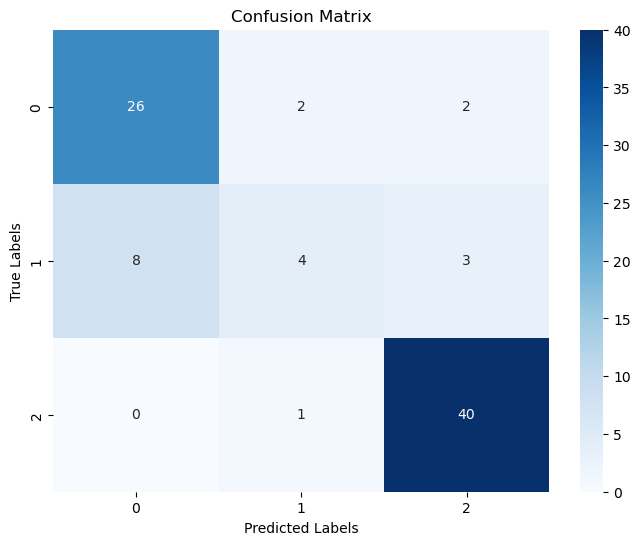

Accuracy score on test dataset: 0.813953488372093


In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the target on the test dataset
predict_test = model.predict(test_x)

# Create the confusion matrix
conf_matrix = confusion_matrix(test_y, predict_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y, predict_test)
print('Accuracy score on test dataset:', accuracy_test)


# 5. Decision Tree

# It is a type of supervised learning algorithm that is mostly used for classification problems. 
Surprisingly, it works for both categorical and continuous dependent variables. In this algorithm,
we split the population into two or more homogeneous sets. This is done based on the most significant
attributes/ independent variables to make as distinct groups as possible

In [55]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [56]:
#postpruning
treemodel=DecisionTreeClassifier(max_depth=3)

In [57]:
treemodel.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'x[19] <= 1.5\ngini = 0.58\nsamples = 199\nvalue = [59, 29, 111]'),
 Text(0.25, 0.625, 'x[19] <= 0.5\ngini = 0.544\nsamples = 89\nvalue = [52, 29, 8]'),
 Text(0.125, 0.375, 'x[6] <= 0.5\ngini = 0.383\nsamples = 60\nvalue = [46, 9, 5]'),
 Text(0.0625, 0.125, 'gini = 0.203\nsamples = 45\nvalue = [40, 3, 2]'),
 Text(0.1875, 0.125, 'gini = 0.64\nsamples = 15\nvalue = [6, 6, 3]'),
 Text(0.375, 0.375, 'x[0] <= 23.0\ngini = 0.471\nsamples = 29\nvalue = [6, 20, 3]'),
 Text(0.3125, 0.125, 'gini = 0.429\nsamples = 26\nvalue = [4, 19, 3]'),
 Text(0.4375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(0.75, 0.625, 'x[18] <= 0.5\ngini = 0.119\nsamples = 110\nvalue = [7, 0, 103]'),
 Text(0.625, 0.375, 'x[16] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 0, 5]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.6875, 0.125, 'gini = 0.408\nsamples = 7\nvalue = [2, 0, 5]'),
 Text(0.875, 0.375, 'x[3] <= 3.5\ngini = 0.058\nsamples = 101\nvalue 

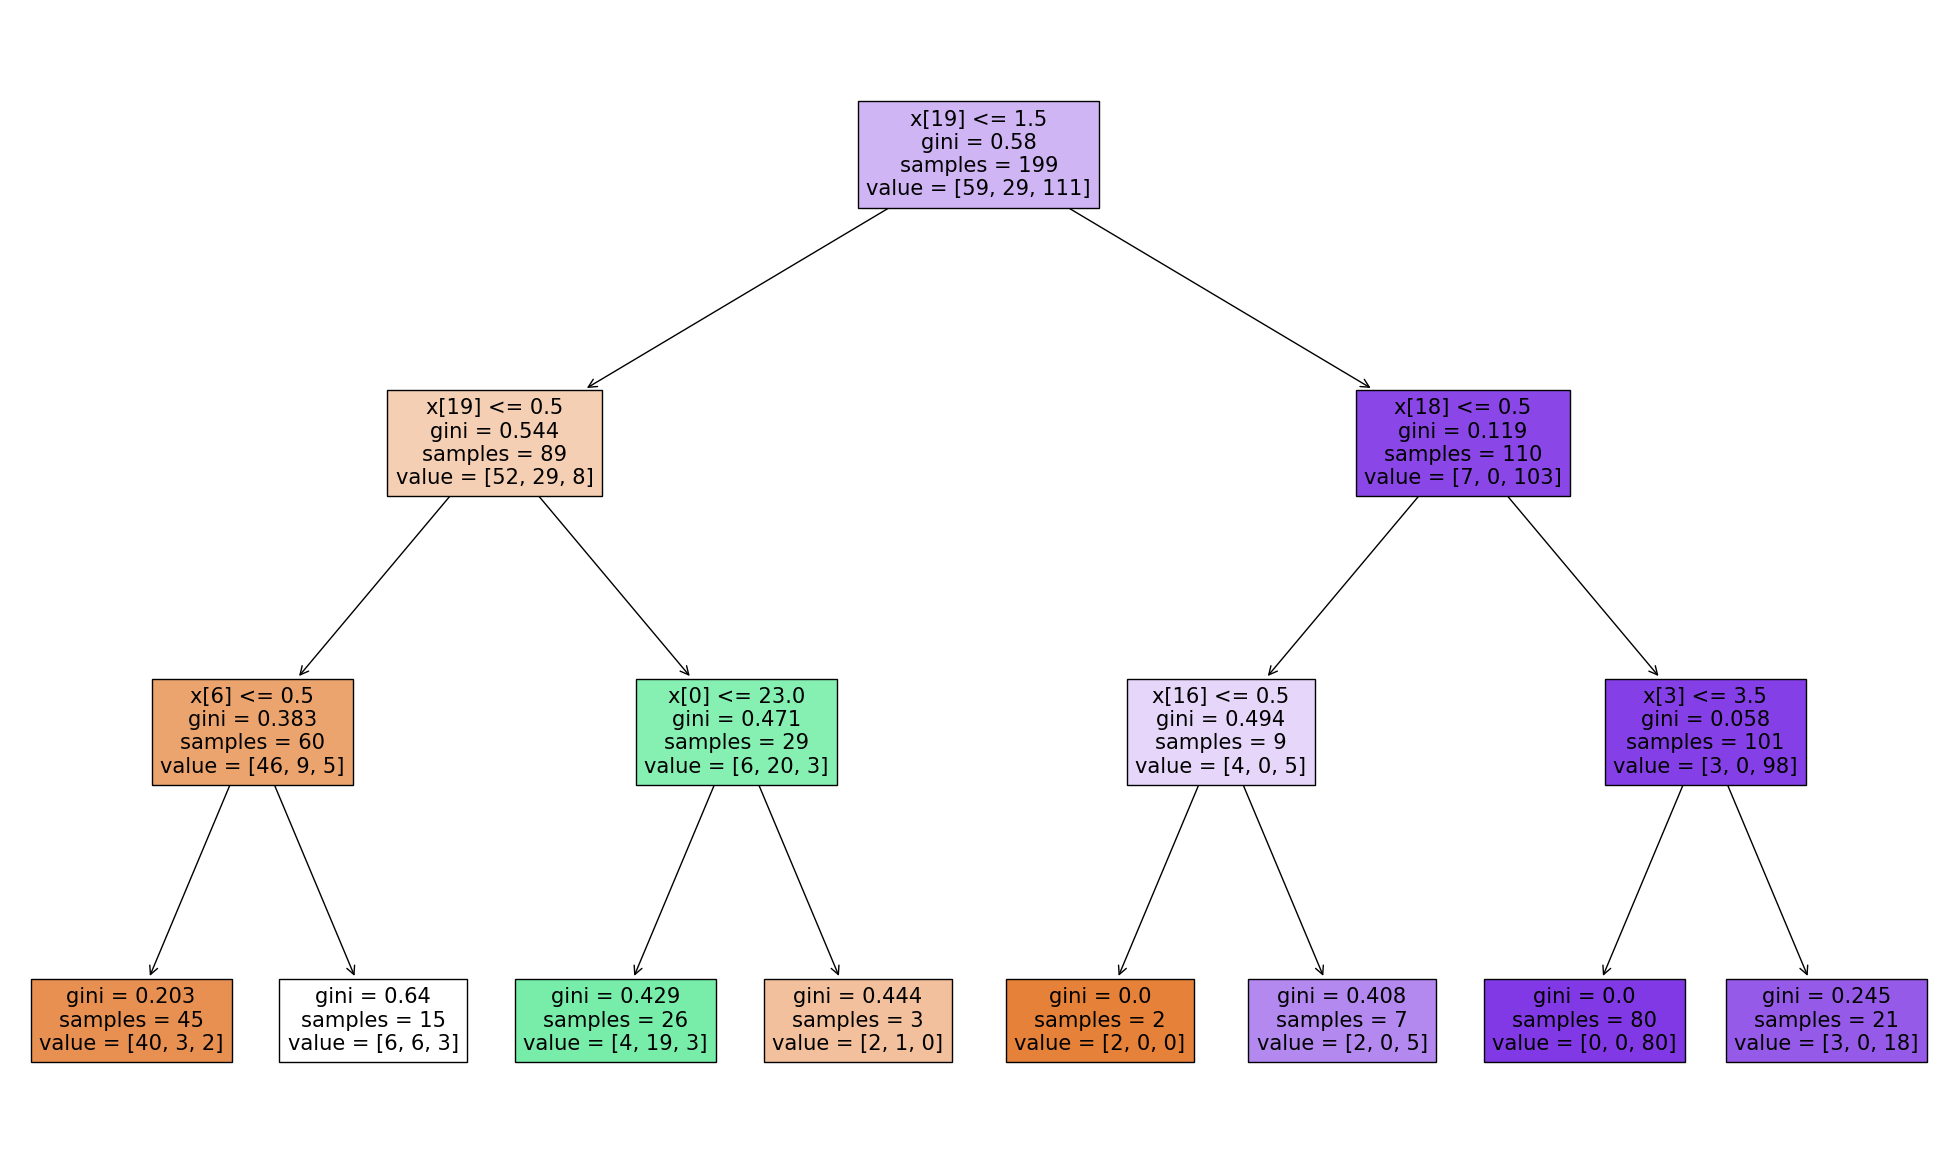

In [58]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(treemodel,filled=True)

In [59]:
#prediction
y_pred=treemodel.predict(test_x)

In [60]:
y_pred

array([0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 2,
       1, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0,
       2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2])

In [61]:
from sklearn.metrics import accuracy_score,classification_report


In [62]:
score=accuracy_score(y_pred,test_y)
print(score)

0.8953488372093024


In [63]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        32
           1       0.67      0.77      0.71        13
           2       0.95      0.95      0.95        41

    accuracy                           0.90        86
   macro avg       0.85      0.87      0.86        86
weighted avg       0.90      0.90      0.90        86



# Support Vector Mechine

# It is a classification method. In SVM algorithm, we plot each data item as a point in n-dimensional space
# (where n is the number of features you have), with the value of each feature being the value of a particular coordinate.

In [64]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [65]:
# Concatenate X_train and y_train for training data
train_data = pd.concat([X_train, y_train], axis=1)

# Concatenate X_test and y_test for testing data
test_data = pd.concat([X_test, y_test], axis=1)

In [66]:
# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Do you feel mental Stress?'],axis=1)
train_y = train_data['Do you feel mental Stress?']

In [67]:
# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Do you feel mental Stress?'],axis=1)
test_y = test_data['Do you feel mental Stress?']


In [68]:
model = SVC()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

Target on train data [2 0 0 0 0 2 0 0 2 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2 0 0 0 0 0 0 0 0 2 2 2 2 2
 2 0 2 0 0 2 0 2 0 0 2 2 2 2 0 2 0 2 2 2 2 2 2 0 0 2 2 0 2 2 2 0 2 2 0 2 2
 0 0 2 2 0 0 0 2 2 0 2 0 2 2 2 2 0 0 0 2 0 2 2 0 2 0 0 2 2 0 2 0 0 2 2 2 2
 0 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 0 2 0 0 2 2 0 2 2 2 0 0 2 2 2 2 2
 0 0 0 2 2 2 0 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 0 0 0 0 2 2 2 2 0 2
 2 2 0 0 2 2 0 0 0 2 0 2 2 0]


In [69]:
# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

accuracy_score on train dataset :  0.7839195979899497


In [70]:
# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 


Target on test data [0 0 2 2 2 2 2 2 0 2 0 2 0 2 0 0 2 0 2 0 0 2 0 2 0 0 0 0 2 0 2 2 2 0 0 0 0
 2 2 2 0 2 0 2 0 2 0 2 2 2 2 2 0 0 2 2 2 2 0 0 0 0 2 2 0 0 2 0 2 0 0 0 2 2
 0 2 2 0 2 0 0 2 2 2 2 2]


In [71]:
# Accuracy Score on test dataset   
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7674418604651163


# 5. Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [2 1 0 0 0 2 1 1 2 1 2 0 2 2 0 2 2 2 1 0 0 2 2 2 0 1 0 1 0 1 0 0 2 2 2 2 2
 2 0 2 0 0 2 1 2 0 0 2 2 2 2 0 2 0 2 1 0 0 1 2 0 1 2 2 0 2 2 2 1 2 2 0 2 2
 0 0 2 2 0 0 0 2 2 0 2 0 2 2 2 2 1 0 0 2 0 2 2 1 1 0 1 2 2 0 2 1 0 2 2 2 2
 0 2 0 2 2 1 2 2 0 1 0 2 2 2 2 2 1 1 2 2 0 0 1 1 2 2 1 2 2 2 0 0 2 1 2 2 2
 1 1 1 2 1 1 0 2 1 0 1 1 0 2 1 2 2 2 2 2 2 0 2 0 2 2 2 0 0 1 1 2 2 2 2 0 2
 2 2 0 0 0 2 0 0 0 2 1 0 2 0]
accuracy_score on train dataset :  0.8341708542713567
Target on test data [1 0 0 2 1 2 2 2 0 2 0 2 0 2 0 0 2 0 2 0 1 2 0 2 1 1 0 0 2 0 2 2 2 0 0 0 0
 1 2 2 0 1 0 1 0 2 0 2 1 2 2 2 0 0 1 2 2 2 0 1 1 1 2 2 0 0 0 0 1 0 0 1 2 1
 1 2 2 1 2 0 0 2 2 1 2 2]
accuracy_score on test dataset :  0.7790697674418605


In [73]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model = MultinomialNB()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [2 1 0 0 0 2 1 1 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 0 0 0 1 0 0 1 0 2 1 1 2 2
 2 0 2 0 0 2 0 2 0 0 2 2 2 2 0 2 0 2 1 2 1 2 2 1 0 2 2 0 2 2 2 1 2 2 0 2 2
 0 0 2 2 2 0 0 2 2 0 2 0 2 2 1 2 1 0 0 2 2 2 2 1 1 0 1 2 2 0 2 1 0 2 2 1 1
 0 2 1 2 2 1 1 2 0 2 0 2 2 2 2 2 1 1 2 2 1 0 0 0 2 2 1 1 2 2 0 0 2 1 2 2 2
 0 0 1 2 2 1 0 2 1 0 2 1 0 2 1 2 1 2 2 2 2 0 2 1 1 2 2 0 0 1 1 2 2 2 2 0 2
 2 2 0 0 2 2 0 0 0 2 1 2 2 0]
accuracy_score on train dataset :  0.7788944723618091
Target on test data [1 0 2 2 1 2 2 2 0 2 0 2 0 2 0 0 2 1 2 0 0 2 1 2 1 1 0 0 2 1 2 2 2 1 0 0 1
 2 2 2 0 1 0 1 0 2 0 2 2 2 2 2 0 1 2 2 2 2 0 1 0 1 2 2 0 0 1 0 2 0 2 0 2 2
 0 2 2 1 2 0 0 2 2 1 2 2]
accuracy_score on test dataset :  0.813953488372093


In [74]:
rom sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
model = BernoulliNB()

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('Target on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

SyntaxError: invalid syntax (3352631370.py, line 1)

# 6. kNN (k- Nearest Neighbors)

In [75]:
import numpy as np

# ... (rest of your code)

train_x_contiguous = np.ascontiguousarray(train_x)

model.fit(train_x_contiguous, train_y)
# ... (rest of your code using train_x_contiguous)



MultinomialNB()

In [76]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier()

# ... (assuming train_x, train_y, test_x, and test_y are prepared)

# Fit the model
model.fit(train_x, train_y)

# Number of neighbors
print('\nThe number of neighbors used to predict the target : ', model.n_neighbors)

# Predict on train and test sets
predict_train = model.predict(train_x)
predict_test = model.predict(test_x)

# Accuracy scores
accuracy_train = accuracy_score(train_y, predict_train)
accuracy_test = accuracy_score(test_y, predict_test)

print('\nTarget on train data:', predict_train)
print('accuracy_score on train dataset : ', accuracy_train)
print('Target on test data:', predict_test)
print('accuracy_score on test dataset : ', accuracy_test)



The number of neighbors used to predict the target :  5


AttributeError: 'Flags' object has no attribute 'c_contiguous'